# Раздел 4. Краевые задачи для ОДУ 2-го порядка. 

# Лабораторная работа №4 вариант №3 задание №1
_Яромир Водзяновский 852_

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd

In [2]:
x_0 = 0.525
u_0 = 0
u_L = 1
accur = 0.0001

In [3]:
# x>x_0
def k_x_g(x):
    return x

def q_x_g(x):
    return np.exp(-x)

def f_x_g(x):
    return x**3

# x<x_0
def k_x_l(x):
    return x**2 + 1

def q_x_l(x):
    return np.exp(-x)

def f_x_l(x):
    return 1

# Аналитическое решение модельной задачи

In [4]:
def lam(k, q):
    return np.sqrt(q/k)

def u_ch(f, q):
    return f/q

mu_l = u_ch(f_x_l(x_0), q_x_l(x_0))
mu_g = u_ch(f_x_g(x_0), q_x_g(x_0))

lam_l = lam(k_x_l(x_0), q_x_l(x_0))
lam_g = lam(k_x_g(x_0), q_x_g(x_0))

A11 = np.e**(-lam_l*x_0) - np.e**(lam_l * x_0)
A12 = np.e**(lam_g*(2-x_0)) - np.e**(lam_g*x_0)
A21 = k_x_l(x_0) * lam_l * (np.e**(lam_l*x_0) + np.e**(-lam_l*x_0))
A22 = k_x_g(x_0)*lam_g * (np.e**(lam_g*(2-x_0)) + np.e**(lam_g*x_0))

B1 = mu_g - mu_l + (mu_l - u_0)*np.e**(lam_l*x_0) - (mu_g - u_L)*np.e**(lam_g*(1-x_0))
B2 = k_x_l(x_0) * lam_l * (u_0 - mu_l) * np.e**(lam_l * x_0) + k_x_g(x_0) * lam_g * (u_L - mu_g) * np.exp(lam_g * (1 - x_0))


C_1 = (((u_0 - mu_l)*A11 - B1)*A22 - ((u_0 - mu_l)*A21 - B2)*A12) / (A11*A22 - A12*A21)
C_2 = (B1*A22 - B2*A12)/(A11*A22 - A12*A21)
C_3 = (B2*A11 - B1*A21)/(A11*A22 - A12*A21)
C_4 = (u_L - mu_g)*np.exp(lam_g) - C_3*np.exp(2*lam_g)


# x<x_0
print('x < x_0')
print(r'C_1 = ', C_1)
print(r'C_2 = ', C_2)
print(r'lam_1 = ', lam_l)
print('u_частн_1 = ', mu_l)
print('\n')

# x>x_0
print('x > x_0')
print(r'C_3 = ', C_3)
print(r'C_4 = ', C_4)
print(r'lam_2 = ', lam_g)
print('u_частн_2 = ', mu_g)


def u_mod1(x):
    u = []
    for i in range(len(x)):
        if x[i]<x_0:
            u.append(C_1*np.e**(lam_l*x[i]) + C_2*np.e**(-lam_l*x[i]) + mu_l)
        else:
            u.append(C_3*np.e**(lam_g*x[i]) + C_4*np.e**(-lam_g*x[i]) + mu_g)
    return np.array(u)

x < x_0
C_1 =  -0.19898204851887594
C_2 =  -1.4914767998602152
lam_1 =  0.6809828700293044
u_частн_1 =  1.6904588483790912


x > x_0
C_3 =  0.3725129048894525
C_4 =  -0.92916607685004
lam_2 =  1.061495229665898
u_частн_2 =  0.24461467804435572


# Численное решение модельной задачи

In [5]:
def u_mod2(L):
    l = int(x_0 *L)
    h = 1/L
    a = np.array([k_x_l(x_0) if i<int(x_0*L) and i>0 else k_x_g(x_0) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    b = np.array([-2*k_x_l(x_0) - h**2*q_x_l(x_0) if i<int(x_0*L) and i>0 else -2*k_x_g(x_0) - h**2*q_x_g(x_0) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    c = np.array([k_x_l(x_0) if i<int(x_0*L) and i>0 else k_x_g(x_0) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    d = np.array([-h**2*f_x_l(x_0) if i<int(x_0*L) and i>0 else -h**2*f_x_g(x_0) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])

    alpha_l = []
    beta_l = []
    alpha_g = []
    beta_g = []

    alpha_l.append(-a[1]/b[1])
    alpha_l.insert(0,0)
    beta_l.append((d[1] - c[1]*u_0)/b[1])
    beta_l.insert(0,0)
    alpha_g.append(-c[L-1]/b[L-1])
    beta_g.append((d[L-1] - c[L-1]*u_L)/b[L-1])


    for i in range(2,l):
        alpha_l.append(-a[i]/(b[i]+c[i]*alpha_l[i-1]))
        beta_l.append((d[i]-c[i]*beta_l[i-1])/(b[i]+c[i]*alpha_l[i-1]))
    for i in range(l+2,L-1):
        k = L-i+l
        alpha_g.insert(0, -c[k]/(b[k]+a[k]*alpha_g[0]))
        beta_g.insert(0, (d[k] - a[k]*beta_g[0])/(b[k]+a[k]*alpha_g[1]))

    alpha_l.append(0)
    alpha_g.insert(0,0)
    alpha_g.append(0)
    alpha = alpha_l + alpha_g

    beta_l.append(0)
    beta_g.insert(0,0)
    beta_g.append(0)
    beta = beta_l + beta_g


    u_l = (k_x_l(x_0) * beta[l-1] + k_x_g(x_0)*beta[l+2]) / (k_x_l(x_0)*(1-alpha[l-1]) + k_x_g(x_0) * (1-alpha[l+2]))
    u_l_m = alpha[l-1]*u_l + beta[l-1]
    u_l_p = alpha[l+2] * u_l + beta[l+2]


    u = [u_l]
    for i in range(1, l):
        k = l-i
        u.insert(0, alpha[k]*u[0]+beta[k])
    u.insert(0,u_0)
    u.append(u_l)
    for i in range(l+2, L):
        u.append(alpha[i]*u[i-1]+beta[i])
    u.append(u_L)

    return np.array(u)

# Численное решение с переменными коэффицентами

In [6]:
def u_fin(L):
    N = L
    x = np.arange(0,1+1/(1000*N),1/N)
    l = int(x_0 *L)
    h = 1/L
    def a(x):
        return np.array([k_x_l(x[i]+h/2) if i<int(x_0*L) and i>0 else k_x_g(x[i]+h/2) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    def b(x):
        return np.array([-(k_x_l(x[i]+h/2)+ k_x_l(x[i]-h/2) + h**2*q_x_l(x[i])) if i<int(x_0*L) and i>0 else -(k_x_g(x[i]+h/2)+ k_x_g(x[i]-h/2) + h**2*q_x_g(x[i])) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    def c(x):
        return np.array([k_x_l(x[i]-h/2) if i<int(x_0*L) and i>0 else k_x_g(x[i]-h/2) if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])
    def d(x):
        return np.array([-f_x_l(x[i])*h**2 if i<int(x_0*L) and i>0 else -f_x_g(x[i])*h**2 if i > int(x_0*L)+1 and i<L else 0 for i in range(L+1)])

    a = a(x)
    b = b(x)
    c = c(x)
    d = d(x)

    alpha_l = []
    beta_l = []
    alpha_g = []
    beta_g = []

    alpha_l.append(-a[1]/b[1])
    alpha_l.insert(0,0)
    beta_l.append((d[1] - c[1]*u_0)/b[1])
    beta_l.insert(0,0)
    alpha_g.append(-c[L-1]/b[L-1])
    beta_g.append((d[L-1] - c[L-1]*u_L)/b[L-1])


    for i in range(2,l):
        alpha_l.append(-a[i]/(b[i]+c[i]*alpha_l[i-1]))
        beta_l.append((d[i]-c[i]*beta_l[i-1])/(b[i]+c[i]*alpha_l[i-1]))
    for i in range(l+2,L-1):
        k = L-i+l
        alpha_g.insert(0, -c[k]/(b[k]+a[k]*alpha_g[0]))
        beta_g.insert(0, (d[k] - a[k]*beta_g[0])/(b[k]+a[k]*alpha_g[1]))

    alpha_l.append(0)
    alpha_g.insert(0,0)
    alpha_g.append(0)
    alpha = alpha_l + alpha_g

    beta_l.append(0)
    beta_g.insert(0,0)
    beta_g.append(0)
    beta = beta_l + beta_g


    # u_l = (k_x_l(x_0) * beta[l-1] + k_x_g(x_0)*beta[l+2]) / (k_x_l(x_0)*(1-alpha[l-1]) + k_x_g(x_0) * (1-alpha[l+2]))
    # u_l_m = alpha[l-1]*u_l + beta[l-1]
    # u_l_p = alpha[l+2] * u_l + beta[l+2]
    u_l = float(u_mod1([x[l+1]]))

    u = [u_l]
    for i in range(1, l):
        k = l-i
        u.insert(0, alpha[k]*u[0]+beta[k])
    u.insert(0,u_0)
    u.append(u_l)
    for i in range(l+2, L):
        u.append(alpha[i]*u[i-1]+beta[i])
    u.append(u_L)

    return np.array(u)


# Сравнение численного и аналитического решений модельной задачи с численным решением задачи с переменными коэффициентами

In [9]:
def plot_table(N):
    np.set_printoptions(formatter={'all':lambda x: np.format_float_scientific(x, precision = 5)})
    fig, ax = plt.subplots(figsize=(10, 6))
    dots = np.arange(0,1+1/(1000*N),1/N)
    ax.plot(dots, u_mod1(dots), 'coral', lw = 2)
    ax.plot(dots, u_mod2(N), 'red', lw = 2)
    ax.plot(dots, u_fin(N), 'b', lw = 2)
    ax.plot([x_0 for i in range(10)], np.arange(0.2,0.6,(0.6-0.2)/10), '--')
    max_diff = max(np.abs(u_mod2(N) - u_mod1(dots)))


    lgnd = ax.legend(['Анал. Модель','Числ. Модель', 'Полное реш.', 'Разрыв'], loc='best', shadow=True)

    ax.minorticks_on()

    ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)

    ax.grid(which='major', linewidth = 0.5)


    plt.show()

    print('Max_diff = {:.4E}'.format(max_diff))

    u1 = u_mod1(dots)
    u2 = u_mod2(N)
    u3 = u_fin(N)
    dot = dots

    pd.set_option('display.float_format', lambda x: '{:.5E}'.format(x))

    set1 = np.concatenate((dot,u1,u2,u3))
    set2 = set1.reshape(4, N+1)
    data = pd.DataFrame(set2)
    data.insert(0,'Output', ['точки x', 'Аналит', 'Числ', 'Answer'], True)
    if N<100:
        return data

## Построим для 11 точек, прерывистой голубой линией показано место точки разрыва

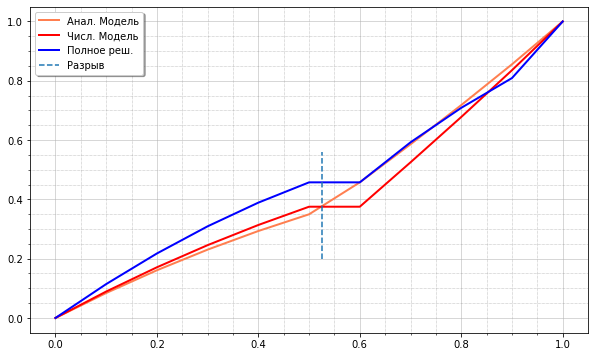

Max_diff = 8.2181E-02


,Output,0,1,2,3,4,5,6,7,8,9,10
0,точки x,0.00000E+00,1.00000E-01,2.00000E-01,3.00000E-01,4.00000E-01,5.00000E-01,6.00000E-01,7.00000E-01,8.00000E-01,9.00000E-01,1.00000E+00
1,Аналит,0.00000E+00,8.41636E-02,1.60875E-01,2.30491E-01,2.93334E-01,3.49695E-01,4.57425E-01,5.85791E-01,7.18004E-01,8.55557E-01,1.00000E+00
2,Числ,0.00000E+00,8.91745E-02,1.70923E-01,2.45625E-01,3.13627E-01,3.75244E-01,3.75244E-01,5.24958E-01,6.77832E-01,8.35586E-01,1.00000E+00
3,Answer,0.00000E+00,1.14260E-01,2.17517E-01,3.09151E-01,3.89018E-01,4.57425E-01,4.57425E-01,5.92416E-01,7.08758E-01,8.09136E-01,1.00000E+00


In [12]:
-2plot_table(10)

Ошибка численного решения модельной задачи по сравнению с аналитическим дает ошибку $error = 8.2181 \cdot 10^{-2}$ 

## Построим для 100001 точки, но без таблицы ввиду размеров

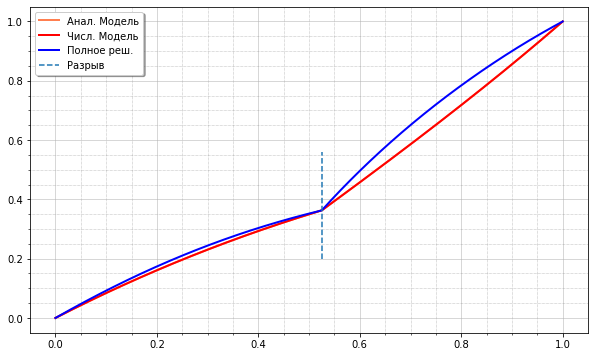

Max_diff = 9.2726E-06


In [13]:
plot_table(100000)

Видим, что при такой точности ошибка модельного численного решения по сравнению с аналитическим дает ошибку $error = 9.2726 \cdot 10^{-6}$. 